Run forced photometry on three full days of all-sky data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from lsst.all_sky_phot.wcs import Fisheye, load_fisheye
from lsst.all_sky_phot import forced_phot, readYBC, readcr2, lsst_earth_location, radec2altaz
import healpy as hp
import glob
import photutils as phu
from astropy.table import Table, hstack, vstack

In [2]:
# Load up the WCS we fit in Full_WCS_fit (generated in notebook Full_WCS_fit)
wcs = load_fisheye('fisheye_wcs.npz')
# Load the Yale Bright Star catalog
ybc = readYBC()

In [3]:
dirs = ['ut012516', 'ut012616', 'ut012716']
zp = 0.
final_table = None
hpmaps = []
mjds = []

for direc in dirs:
    files = glob.glob(direc +'/*.long.cr2')
    for filename in files:
        im, header = readcr2(filename)
        sum_image = np.sum(im, axis=2).astype(float)
        
        alt_cat, az_cat = radec2altaz(ybc['RA'], ybc['Dec'], header['mjd'])
        above = np.where(alt_cat > 15.)
        phot_table, hpmap = forced_phot(sum_image, wcs, zp, alt_cat[above], az_cat[above],
                   ybc['Vmag'].values[above], ybc['HR'].values[above], return_table=True,
                                       mjd=header['mjd'])
        phot_table.remove_columns(['xcenter', 'ycenter'])
        if final_table is None:
            final_table = phot_table.copy()
        else:
            final_table = vstack([final_table, phot_table])
        hpmaps.append(hpmap)
        mjds.append(header['mjd'])


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: divide by zero encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astr

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: divide by zero encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astr

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: divide by zero encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_a

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: Runtim

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: divide by zero encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astr

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: divide by zero encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astr

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: Runtim

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: divide by zero encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astr

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lss

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:526: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/yoachim/gitRepos/all_sky_phot/python/lsst/all_sky_phot/forced_phot.py:94: RuntimeWarning: invalid value encountered in log10
  phot_table['residual_aperture_mag'] = -2.5*np.log10(final_sum) + zp
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/astropy/coordinates/angles.py:643: RuntimeWarning: invalid value encounte

In [4]:
# convert things to numpy arrays
mjds = np.array(mjds)
hpmaps = np.array(hpmaps)

np.savez('forced_phot_results/trans_maps.npz', mjds=mjds, hpmaps=hpmaps)
final_table.write('3_day_photometry.hdf5', path='forced_phot_results', format='hdf5')

In [5]:
back = Table.read('3_day_photometry.hdf5', format='hdf5', path='forced_phot_results')

In [6]:
len(back), len(final_table)

(3943108, 3943108)

In [7]:
len(hpmaps)

1091

/Users/yoachim/lsstp3/DarwinX86/healpy/1.10.3.lsst1/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/DarwinX86/healpy/1.10.3.lsst1/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/DarwinX86/healpy/1.10.3.lsst1/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


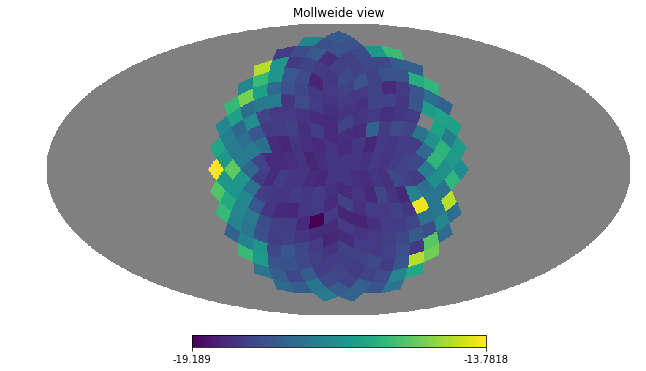

In [15]:
hp.mollview(hpmaps[61], rot=[0,90,0])